In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
housing_price = pd.read_csv('H_train.csv')
housing_price.head().T

,0,1,2,3,4
Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,RL,RL,RL,RL,RL
LotFrontage,65.0,80.0,68.0,60.0,84.0
LotArea,8450,9600,11250,9550,14260
...,...,...,...,...,...
MoSold,2,5,9,2,12
YrSold,2008,2007,2008,2006,2008
SaleType,WD,WD,WD,WD,WD
SaleCondition,Normal,Normal,Normal,Abnorml,Normal


In [4]:
housing_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
housing_price = housing_price.drop('Id', axis=1)

In [6]:
housing_price_num = housing_price.select_dtypes(include= ['int64', 'float64'])
housing_price_cat = housing_price.select_dtypes(include='object')
print(housing_price_cat.shape, housing_price_num.shape)

(1460, 43) (1460, 37)


In [7]:
housing_price_num.isna().sum()[housing_price_num.isna().sum()>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [8]:
cat_missing_values = pd.DataFrame(housing_price_cat.isna().sum()[housing_price_cat.isna().sum()>0]).sort_values(by=0, ascending=False)
cat_missing_values

,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
GarageType,81
GarageFinish,81
GarageQual,81
GarageCond,81


In [9]:
housing_price[housing_price['Electrical'].isna()].T

,1379
MSSubClass,80
MSZoning,RL
LotFrontage,73.0
LotArea,9735
Street,Pave
...,...
MoSold,5
YrSold,2008
SaleType,WD
SaleCondition,Normal


In [10]:
housing_price['Electrical'].value_counts()

Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64

In [11]:
housing_price[housing_price['YearBuilt'] == 2006]['Electrical'].value_counts()

Electrical
SBrkr    66
Name: count, dtype: int64

In [12]:
electrical_map = {np.NAN: 'SBrkr'}

housing_price['Electrical'] = housing_price['Electrical'].replace(electrical_map)

In [13]:
missing_values = cat_missing_values.index
housing_price[missing_values] = housing_price[missing_values].fillna("NaN")

In [14]:
housing_price = housing_price[housing_price['MasVnrArea'].notna()]

housing_price.isna().sum()[housing_price.isna().sum() > 0]

LotFrontage    257
GarageYrBlt     81
dtype: int64

In [15]:
housing_price_num = housing_price_num[housing_price_num['MasVnrArea'].notna()]
missing_values = ["LotFrontage", "GarageYrBlt"]

housing_price_num = housing_price_num[housing_price_num['MasVnrArea'].notna()]
missing_values = ["LotFrontage", "GarageYrBlt"]

housing_price_num[missing_values] = housing_price_num[missing_values].fillna(0)

housing_price_num[missing_values] = housing_price_num[missing_values].fillna(0)

In [16]:
name_mapping = {'MSSubClass': 'Types of Building',
                'LotFrontage': 'Front footage of the property',
                'LotArea': 'Lot size in square feet',
                'OverallQual': 'Overall Quality',
                'OverallCond': 'Overall Condition',
                'YearBuilt': 'Year Built',
                'YearRemodAdd': 'Last Remodeling',
                'MasVnrArea': 'Masonry veneer area in square feet',
                'BsmtFinSF1': 'Finished Basement area',
                'BsmtFinSF2': 'Rating of basement',
                'BsmtUnfSF': 'Unfinished Basement Area',
                'TotalBsmtSF': 'Total square feet of basement area',
                '1stFlrSF': 'First Floor square feet',
                '2ndFlrSF': 'Second floor square feet',
                'LowQualFinSF': 'Low quality finished square feet',
                'GrLivArea': 'Above grade (ground) living area square feet',
                'BsmtFullBath': 'Basement full bathrooms',
                'BsmtHalfBath': 'Basement half bathrooms',
                'FullBath': 'Full bathrooms above grade',
                'HalfBath': 'Half baths above grade',
                'BedroomAbvGr': 'Bedrooms above grade',
                'KitchenAbvGr':'Kitchens above grade',
                'TotRmsAbvGrd': 'Total rooms above grade',
                'Fireplaces': 'Number of fireplaces',
                'GarageYrBlt': 'Year garage was built',
                'GarageCars': 'Size of garage in car capacity',
                'GarageArea': 'Size of garage in square feet',
                'WoodDeckSF': 'Wood deck area in square feet',
                'OpenPorchSF': 'Open porch area in square feet',
                'EnclosedPorch': 'Enclosed porch area in square feet',
                '3SsnPorch': 'Three season porch area in square feet',
                'ScreenPorch': 'Screen porch area in square feet',
                'PoolArea': 'Pool area in square feet',
                'MiscVal': 'Value of miscellaneous feature',
                'MoSold': 'Month Sold',
                'YrSold': 'Year Sold'
                }

housing_price = housing_price.rename(name_mapping, axis=1)
housing_price_num = housing_price_num.rename(name_mapping, axis=1)

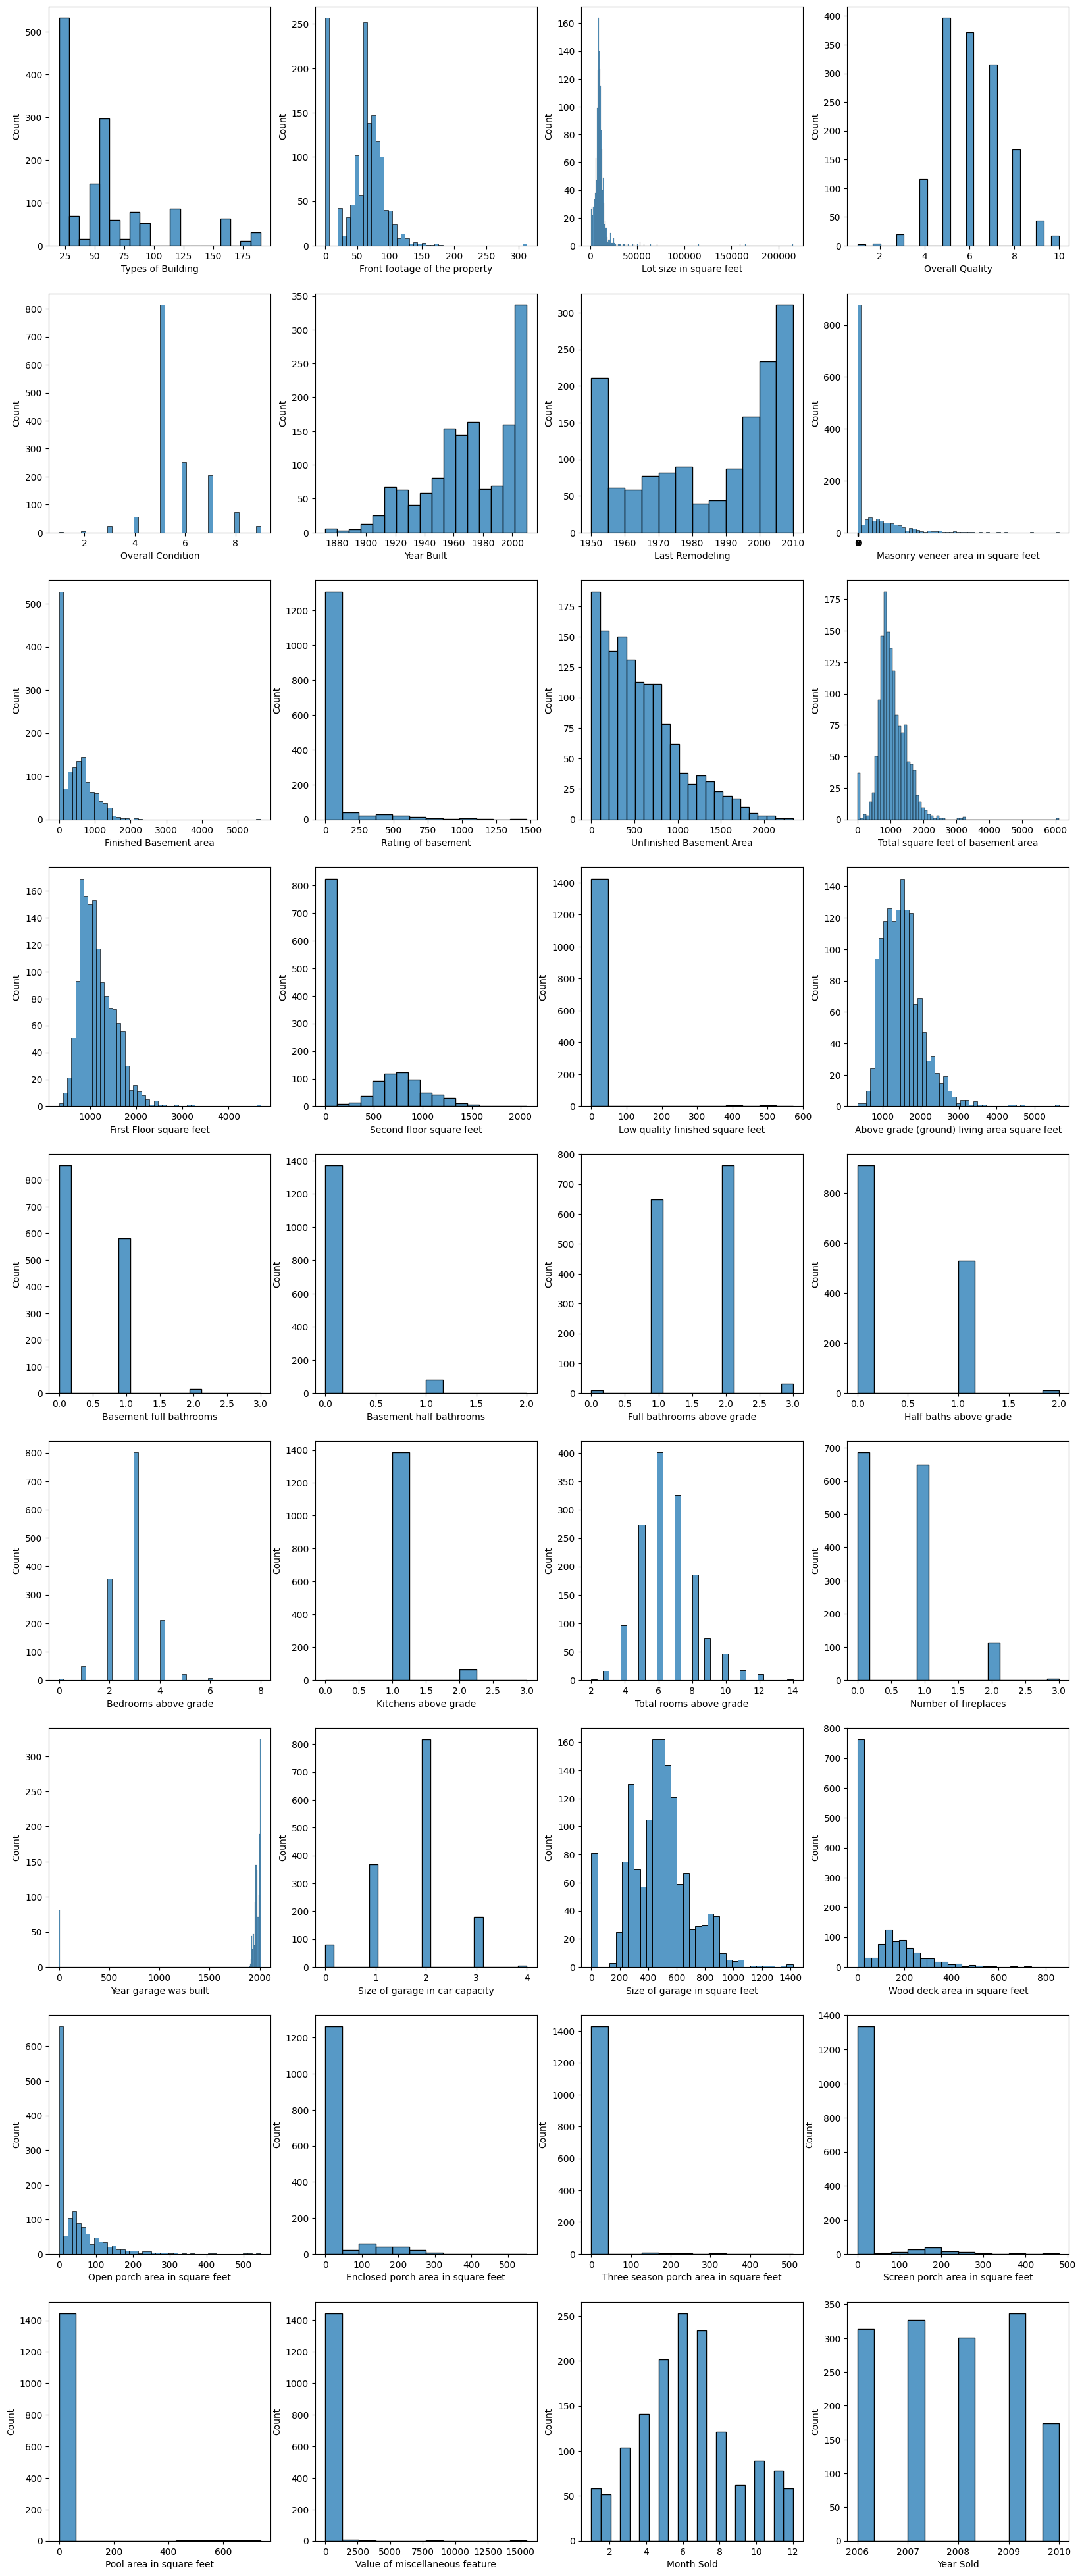

In [17]:
fig, ax = plt.subplots(9, 4)
fig.set_figwidth(20)
fig.set_figheight(50)
ax[1, 3].set_xticks(np.arange(0, 10, step=1))
c = 0
r = 0
for col in housing_price_num.drop('SalePrice', axis=1).columns:
    sns.histplot(x=housing_price_num[col],ax=ax[r, c])
    c+=1
    if c > 3:
        r += 1
        c = 0

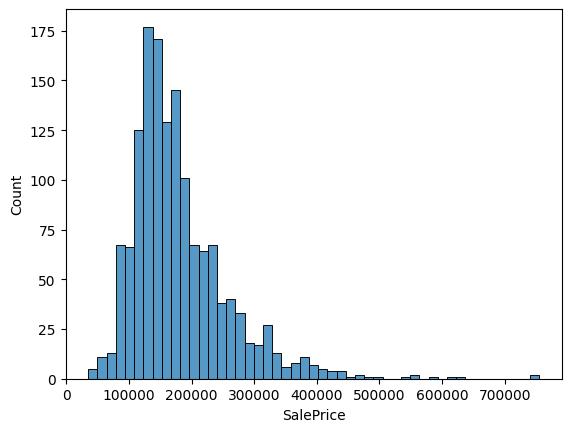

In [18]:
sns.histplot(housing_price_num['SalePrice']);

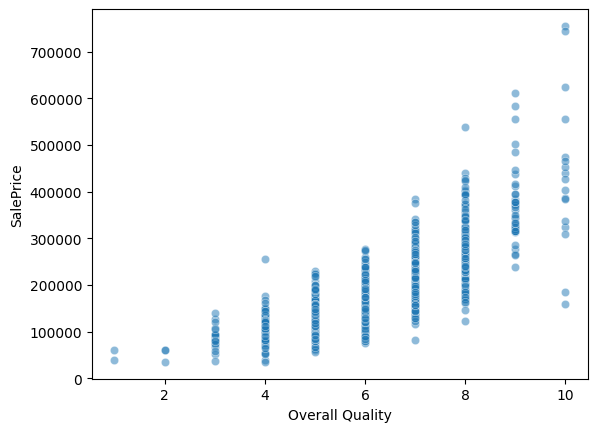

In [19]:
sns.scatterplot(housing_price_num,x=housing_price_num['Overall Quality'], y=housing_price_num['SalePrice'], alpha=0.5);

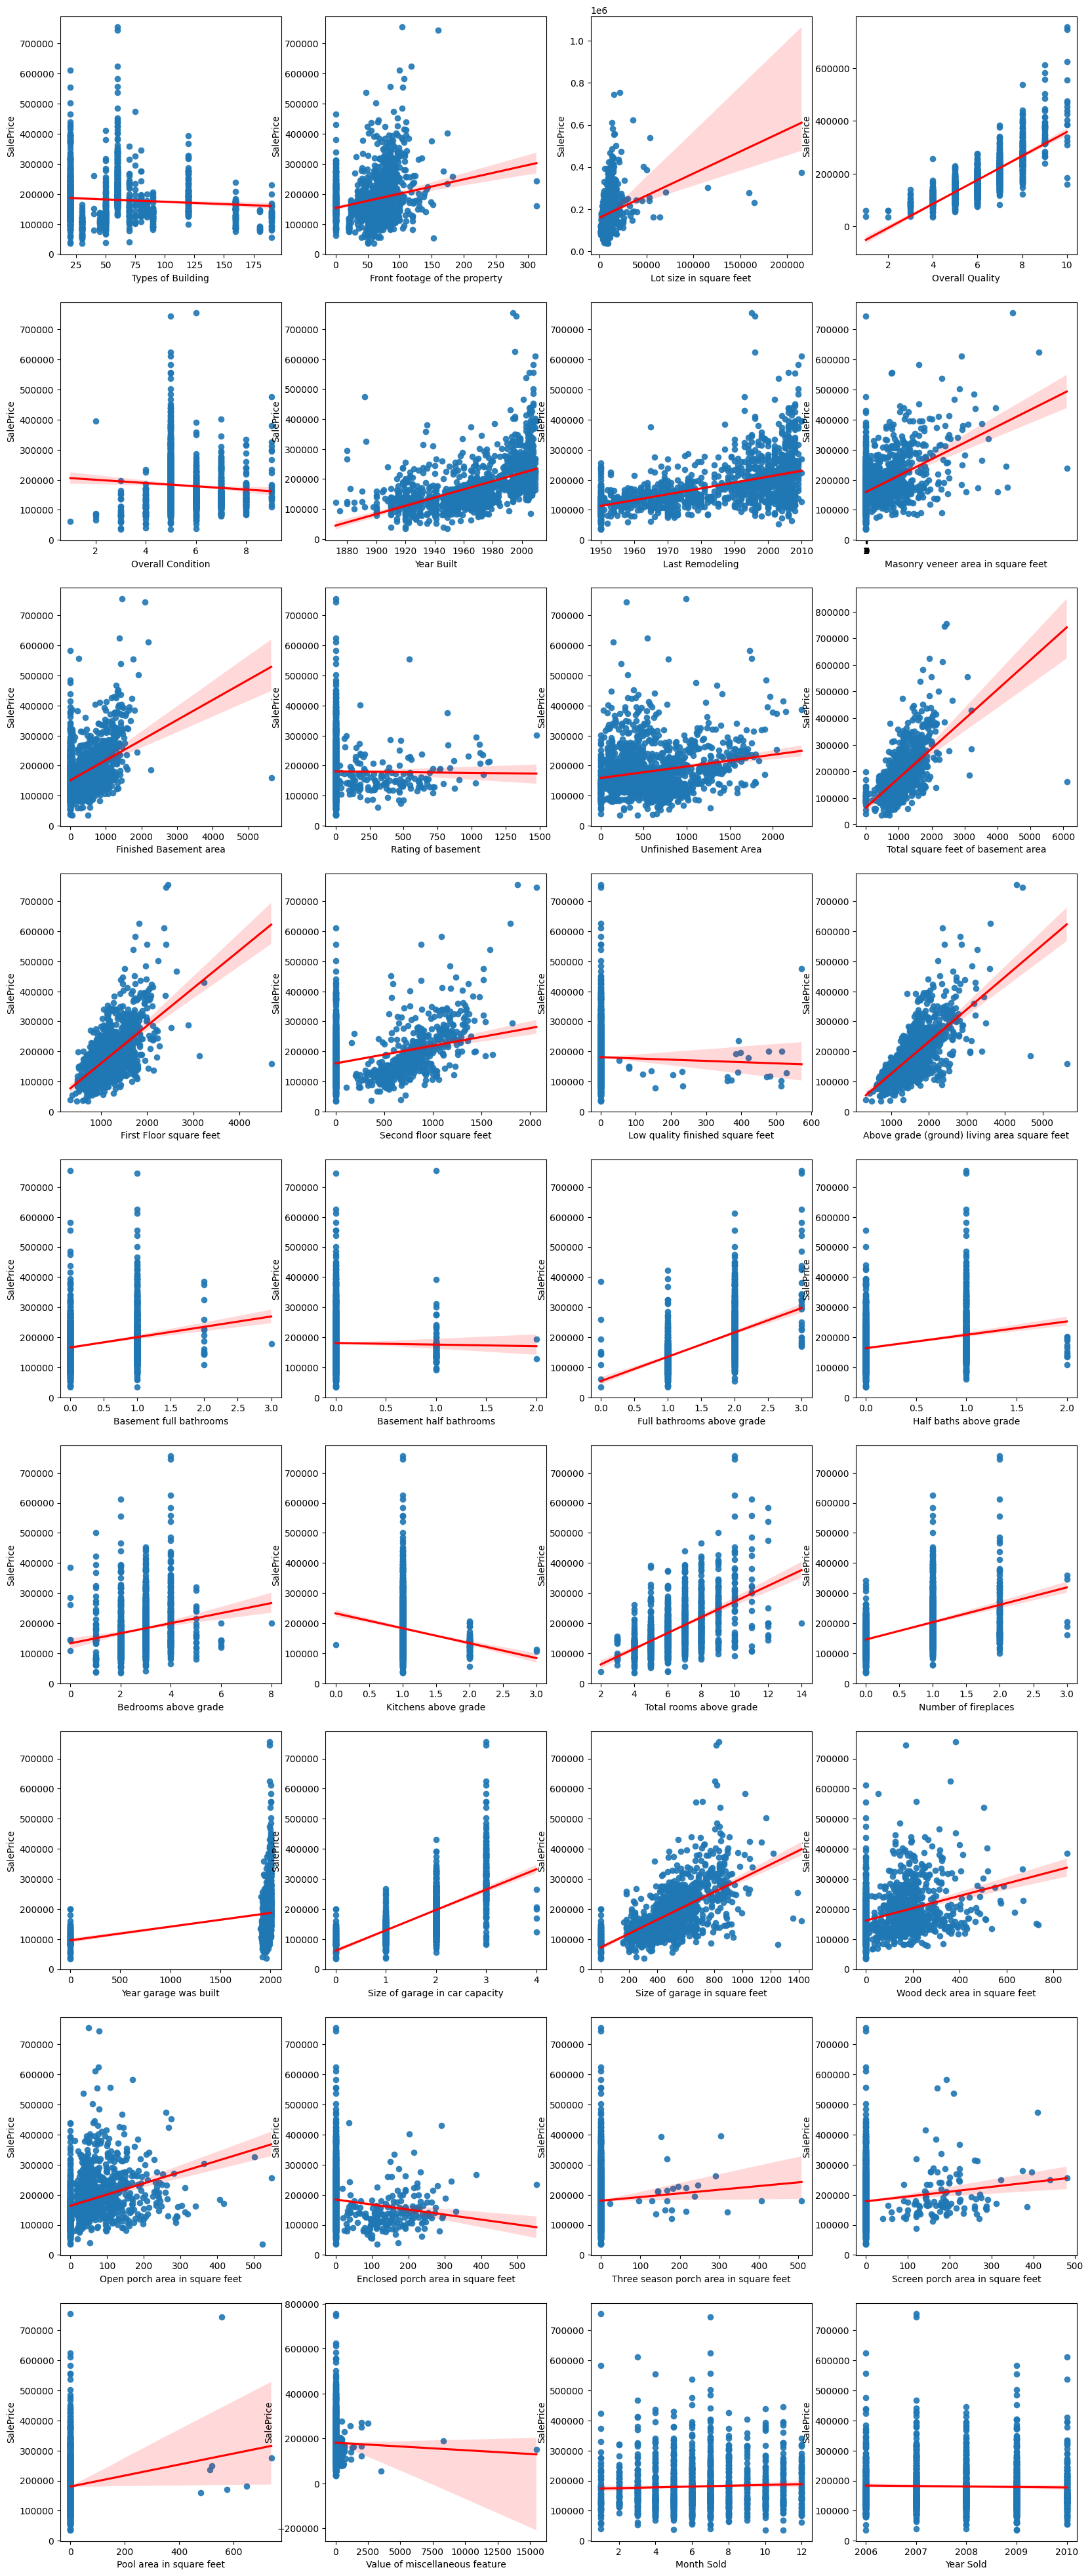

In [20]:
fig, ax = plt.subplots(9, 4, figsize=(20, 50))
ax[1, 3].set_xticks(np.arange(0, 10, step=1))
c = 0
r = 0
for col in housing_price_num.drop('SalePrice', axis=1).columns:
    sns.scatterplot(data=housing_price_num,
                    x=col, 
                    y='SalePrice',
                    alpha=0.5,
                    ax=ax[r, c])
    sns.regplot(data=housing_price_num, 
                x= col, 
                y='SalePrice', 
                line_kws = {'color':'red'}, 
                ax=ax[r, c])
    c+=1
    if c > 3:
        r += 1
        c = 0

In [21]:
categories = housing_price_cat.columns

for category in categories:
    housing_price.loc[:, category +' factorised'] = pd.factorize(housing_price[category])[0]

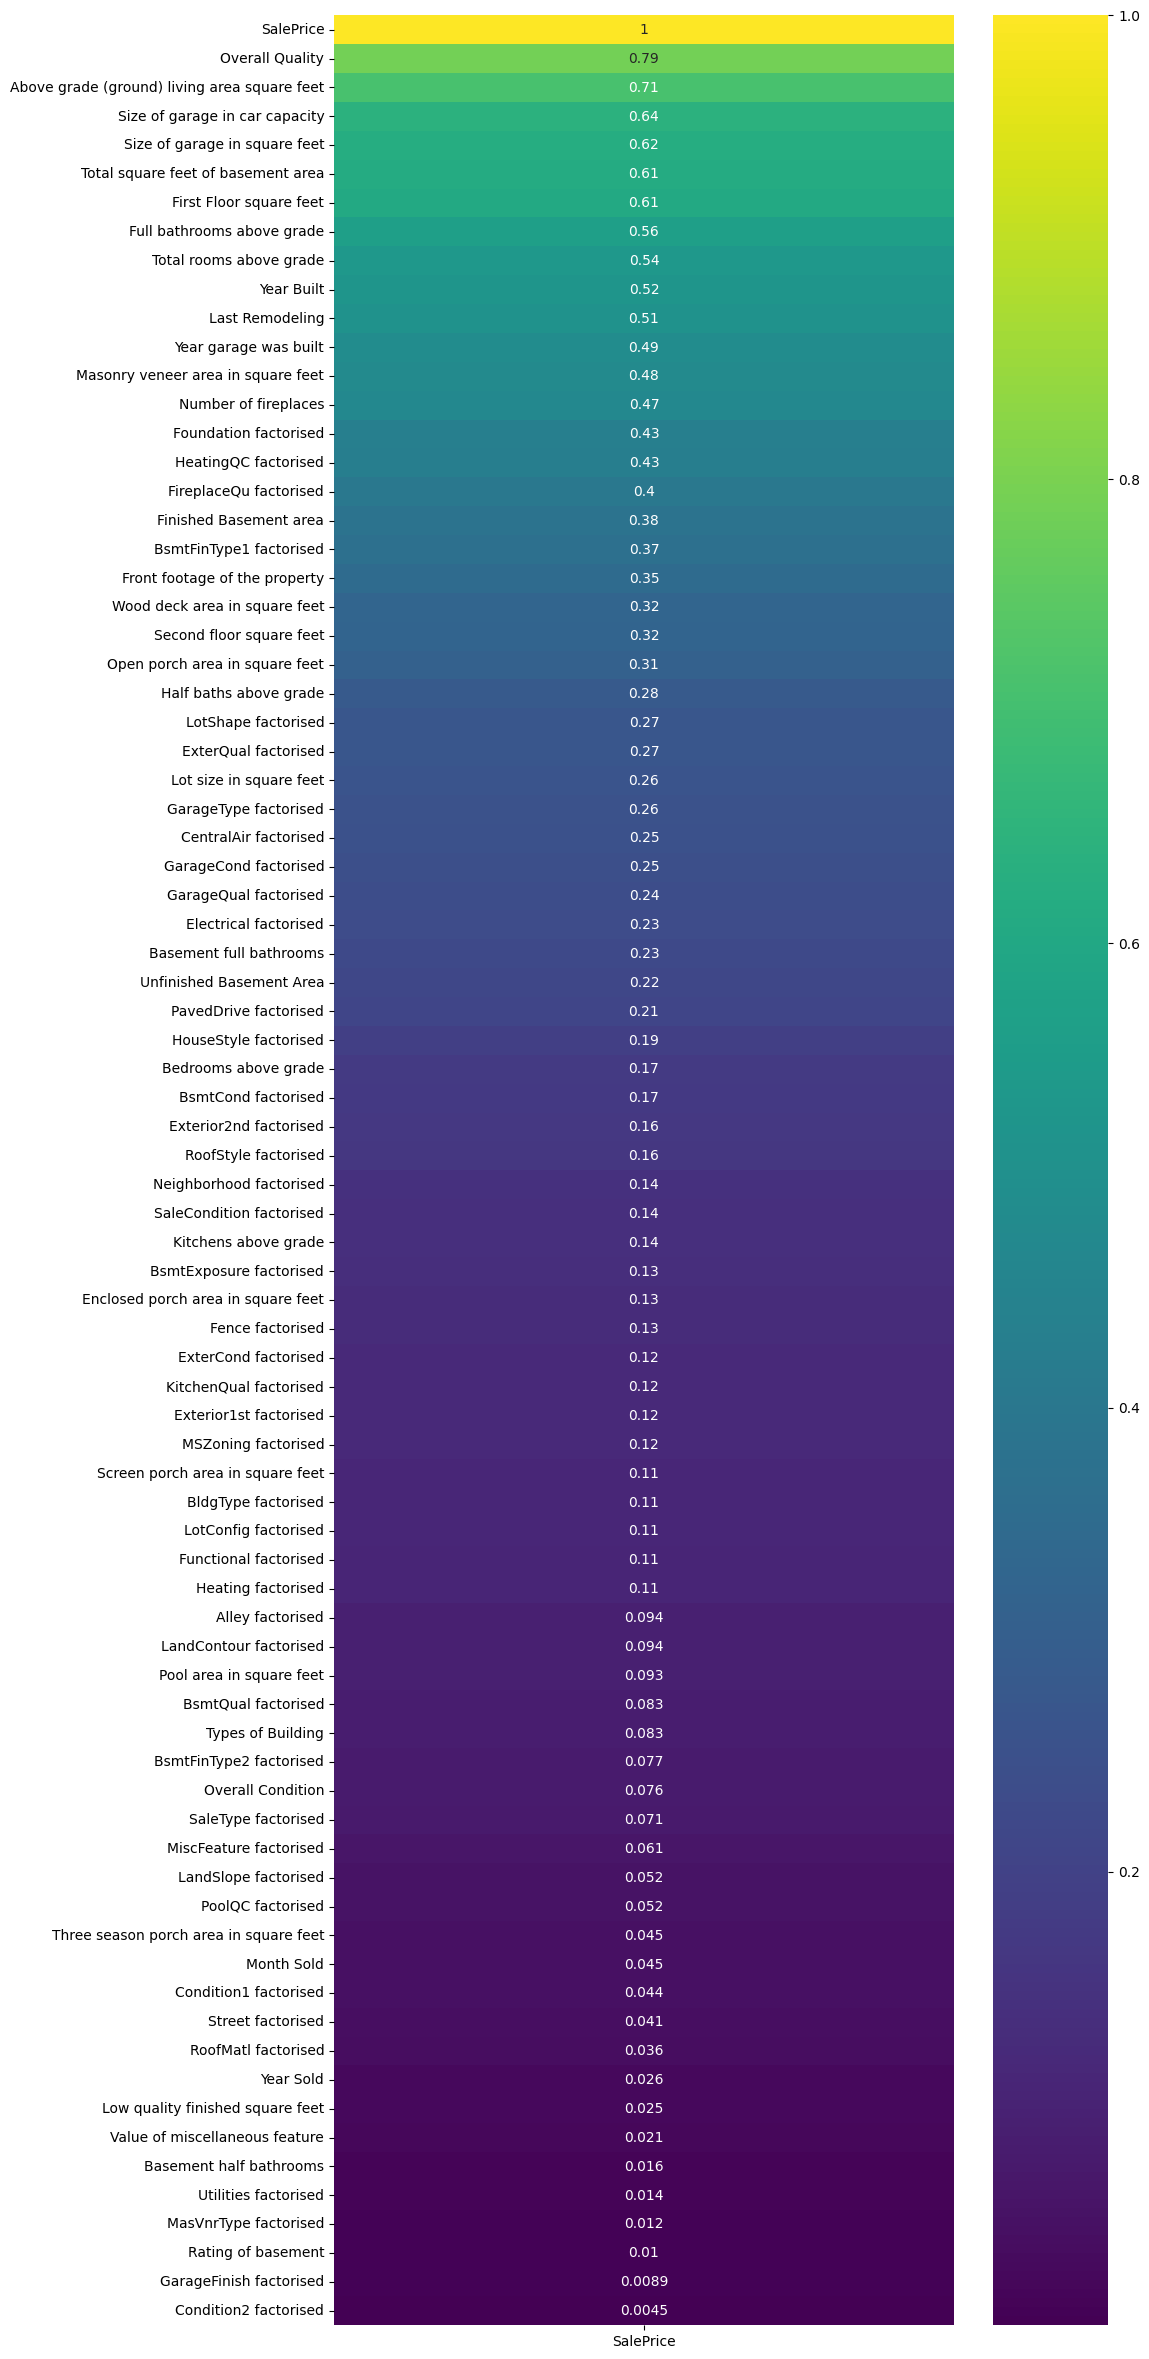

In [22]:
corr_matrix = housing_price.drop(categories,axis=1).corr()['SalePrice']
corr = corr_matrix.abs().sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(10, 30))
sns.heatmap(data =corr.to_frame(), annot=True, cmap='viridis');

In [24]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [25]:
housing_price[['Front footage of the property', 
               'Year garage was built', 
               'Masonry veneer area in square feet']] = housing_price[['Front footage of the property', 
                                                                       'Year garage was built', 
                                                                       'Masonry veneer area in square feet']].fillna(0.0)

In [26]:
drop_feature = ['SalePrice'] + list(categories)
X = housing_price.drop(drop_feature, axis=1)
y= housing_price['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

CatBoostRegressor1 = CatBoostRegressor( depth=10,
                                       learning_rate=0.2,
                                       random_seed=42,
                                       n_estimators=500,
                                       boost_from_average=True,
                                       loss_function='RMSE'

                                       )

CatBoostRegressor1.fit(X, y)

0:	learn: 70178.8688252	total: 190ms	remaining: 1m 34s
1:	learn: 61965.2246809	total: 244ms	remaining: 1m
2:	learn: 55534.3698731	total: 294ms	remaining: 48.7s
3:	learn: 50272.7463292	total: 350ms	remaining: 43.4s
4:	learn: 46261.7856697	total: 401ms	remaining: 39.7s
5:	learn: 41810.7188365	total: 442ms	remaining: 36.4s
6:	learn: 38254.0504395	total: 479ms	remaining: 33.8s
7:	learn: 35328.5675924	total: 516ms	remaining: 31.8s
8:	learn: 33010.3825847	total: 555ms	remaining: 30.3s
9:	learn: 30935.3401328	total: 593ms	remaining: 29.1s
10:	learn: 28860.7588405	total: 605ms	remaining: 26.9s
11:	learn: 27245.1651726	total: 651ms	remaining: 26.5s
12:	learn: 25828.8116191	total: 688ms	remaining: 25.8s
13:	learn: 24600.1674321	total: 726ms	remaining: 25.2s
14:	learn: 23598.5183590	total: 765ms	remaining: 24.7s
15:	learn: 22608.5401159	total: 800ms	remaining: 24.2s
16:	learn: 21975.3970061	total: 834ms	remaining: 23.7s
17:	learn: 21242.5165628	total: 868ms	remaining: 23.2s
18:	learn: 20719.21019

In [27]:
y_pred = CatBoostRegressor1.predict(X)

mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)


print(f'Mean Absolute Error: {mae:.2f}')
print(f'R-squared: {r2:.4f}')

Mean Absolute Error: 52.72
R-squared: 1.0000


IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


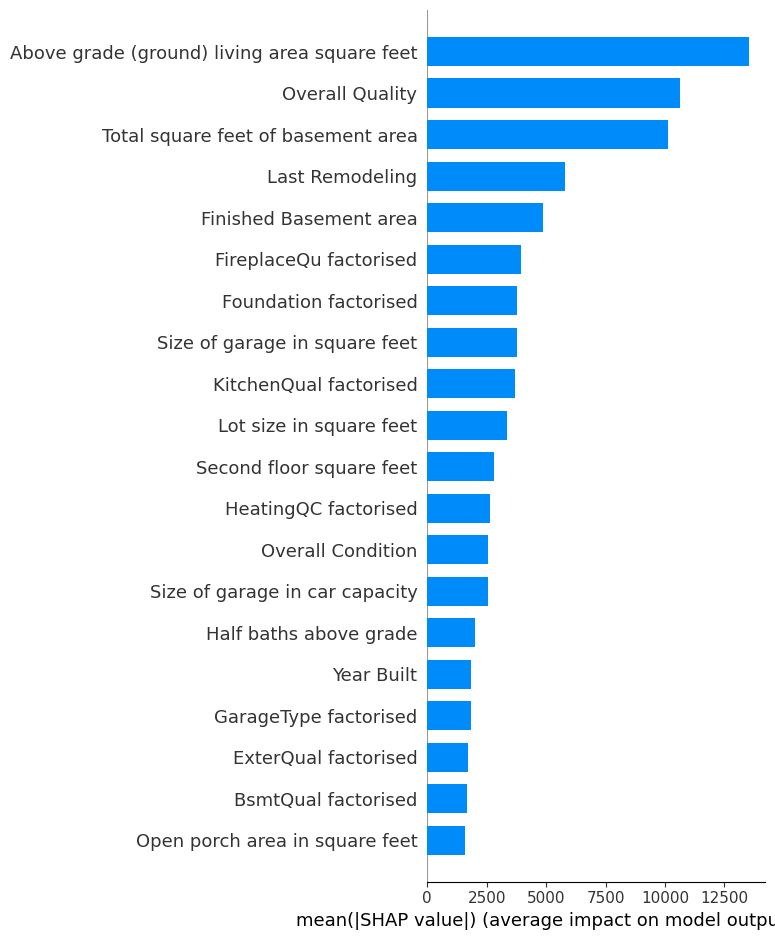

In [29]:
import shap
Explainer = shap.Explainer(CatBoostRegressor1)
shap_values = Explainer.shap_values(X)
shap.summary_plot(shap_values, X, plot_type="bar")

In [30]:
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostRegressor

In [31]:
cat_feature= list(housing_price_cat.columns)

scaler = StandardScaler()
scaled_housing_price = pd.DataFrame(scaler.fit_transform(housing_price.drop(cat_feature, axis=1)))

X = scaled_housing_price.drop(0, axis=1)
y= scaled_housing_price[0]

CatBoostRegressor = CatBoostRegressor( depth=10,
                                       learning_rate=0.2,
                                       random_seed=42,
                                       n_estimators=500,
                                       boost_from_average=True,
                                       loss_function='RMSE',
                                      

                                       )

CatBoostRegressor.fit(X, y)

0:	learn: 0.8528365	total: 67.4ms	remaining: 33.6s
1:	learn: 0.7227022	total: 125ms	remaining: 31s
2:	learn: 0.6115552	total: 162ms	remaining: 26.9s
3:	learn: 0.5387890	total: 196ms	remaining: 24.3s
4:	learn: 0.4656543	total: 234ms	remaining: 23.2s
5:	learn: 0.4169538	total: 268ms	remaining: 22.1s
6:	learn: 0.3617264	total: 304ms	remaining: 21.4s
7:	learn: 0.3146380	total: 323ms	remaining: 19.9s
8:	learn: 0.2820140	total: 358ms	remaining: 19.5s
9:	learn: 0.2523846	total: 399ms	remaining: 19.6s
10:	learn: 0.2282992	total: 404ms	remaining: 17.9s
11:	learn: 0.2085006	total: 438ms	remaining: 17.8s
12:	learn: 0.1902763	total: 471ms	remaining: 17.7s
13:	learn: 0.1764873	total: 507ms	remaining: 17.6s
14:	learn: 0.1609589	total: 542ms	remaining: 17.5s
15:	learn: 0.1510342	total: 574ms	remaining: 17.4s
16:	learn: 0.1422727	total: 608ms	remaining: 17.3s
17:	learn: 0.1336909	total: 644ms	remaining: 17.2s
18:	learn: 0.1263108	total: 696ms	remaining: 17.6s
19:	learn: 0.1197844	total: 746ms	remainin

In [32]:
y_pred = CatBoostRegressor.predict(X)

mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f'Mean Absolute Error: {mae:.2f}')
print(f'R-squared: {r2:.4f}')

Mean Absolute Error: 0.00
R-squared: 1.0000


In [33]:
X.shape

(1452, 79)

In [34]:
test_data = pd.read_csv('H_test.csv')

In [35]:
test_data_num = test_data.select_dtypes(include= ['int64', 'float64'])
test_data_cat = test_data.select_dtypes(include='object')

In [36]:
cat_missing_values = pd.DataFrame(test_data_cat.isna().sum()[test_data_cat.isna().sum()>0]).sort_values(by=0, ascending=False)

In [37]:
missing_values = cat_missing_values.index

test_data[missing_values] = test_data[missing_values].fillna("NaN")

In [38]:
test_data = test_data.rename(name_mapping, axis=1)
test_data_num = test_data_num.rename(name_mapping, axis=1)

In [39]:
categories = test_data_cat.columns

for category in categories:
    test_data.loc[:, category +' factorised'] = pd.factorize(test_data[category])[0]

In [40]:
test_data.shape

(1459, 123)

In [41]:
test_data[['Front footage of the property', 
               'Year garage was built', 
               'Masonry veneer area in square feet']] = test_data[['Front footage of the property', 
                                                                       'Year garage was built', 
                                                                       'Masonry veneer area in square feet']].fillna(0.0)

In [42]:
cat = housing_price.drop(list(categories), axis=1).columns
cat

Index(['Types of Building', 'Front footage of the property',
       'Lot size in square feet', 'Overall Quality', 'Overall Condition',
       'Year Built', 'Last Remodeling', 'Masonry veneer area in square feet',
       'Finished Basement area', 'Rating of basement',
       'Unfinished Basement Area', 'Total square feet of basement area',
       'First Floor square feet', 'Second floor square feet',
       'Low quality finished square feet',
       'Above grade (ground) living area square feet',
       'Basement full bathrooms', 'Basement half bathrooms',
       'Full bathrooms above grade', 'Half baths above grade',
       'Bedrooms above grade', 'Kitchens above grade',
       'Total rooms above grade', 'Number of fireplaces',
       'Year garage was built', 'Size of garage in car capacity',
       'Size of garage in square feet', 'Wood deck area in square feet',
       'Open porch area in square feet', 'Enclosed porch area in square feet',
       'Three season porch area in square fe

In [43]:
len(cat)

80

In [45]:
cat_feature= list(test_data_cat.columns)
test_data = test_data.drop(cat_feature, axis=1)

X = test_data.drop('Id', axis=1)

KeyError: "['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'] not found in axis"

In [46]:
X.shape

(1459, 79)

In [47]:
X.T

,0,1,2,3,4,5,6,7,8,9,...,1449,1450,1451,1452,1453,1454,1455,1456,1457,1458
Types of Building,20.0,20.0,60.0,60.0,120.0,60.0,20.0,60.0,20.0,20.0,...,180.0,160.0,20.0,160.0,160.0,160.0,160.0,20.0,85.0,60.0
Front footage of the property,80.0,81.0,74.0,78.0,43.0,75.0,0.0,63.0,85.0,70.0,...,21.0,21.0,80.0,21.0,21.0,21.0,21.0,160.0,62.0,74.0
Lot size in square feet,11622.0,14267.0,13830.0,9978.0,5005.0,10000.0,7980.0,8402.0,10176.0,8400.0,...,1470.0,1484.0,13384.0,1533.0,1526.0,1936.0,1894.0,20000.0,10441.0,9627.0
Overall Quality,5.0,6.0,5.0,6.0,8.0,6.0,6.0,6.0,7.0,4.0,...,4.0,4.0,5.0,4.0,4.0,4.0,4.0,5.0,5.0,7.0
Overall Condition,6.0,6.0,5.0,6.0,5.0,5.0,7.0,5.0,5.0,5.0,...,6.0,4.0,5.0,5.0,5.0,7.0,5.0,7.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PoolQC factorised,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Fence factorised,0.0,1.0,0.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0
MiscFeature factorised,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
SaleType factorised,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
final_preds = CatBoostRegressor1.predict(X)

In [49]:
final_preds = pd.DataFrame(final_preds)
final_preds

,0
0,145556.697606
1,180215.973488
2,184118.444942
3,184809.821467
4,179618.255383
...,...
1454,101380.186992
1455,110040.014432
1456,188608.309279
1457,121027.705619


In [50]:
submission= pd.DataFrame({'Id': test_data.Id,'SalePrice': final_preds[0]})
submission

,Id,SalePrice
0,1461,145556.697606
1,1462,180215.973488
2,1463,184118.444942
3,1464,184809.821467
4,1465,179618.255383
...,...,...
1454,2915,101380.186992
1455,2916,110040.014432
1456,2917,188608.309279
1457,2918,121027.705619


In [51]:
submission.to_csv('submission_H.csv', index=False)